In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import plane_att_n_heads

number of parameters: 0.000225 M 
step 0: train loss 0.1635, val loss 0.1542
step 1: train loss 0.1640, val loss 0.1552
step 2: train loss 0.1627, val loss 0.1538
step 3: train loss 0.1615, val loss 0.1529
step 4: train loss 0.1575, val loss 0.1486
step 5: train loss 0.1509, val loss 0.1426
step 6: train loss 0.1415, val loss 0.1336
step 7: train loss 0.1285, val loss 0.1218
step 8: train loss 0.1100, val loss 0.1045
step 9: train loss 0.0883, val loss 0.0836
step 10: train loss 0.0638, val loss 0.0600
step 11: train loss 0.0382, val loss 0.0363
step 12: train loss 0.0168, val loss 0.0161
step 13: train loss 0.0076, val loss 0.0075
step 14: train loss 0.0187, val loss 0.0182
step 15: train loss 0.0356, val loss 0.0350
step 16: train loss 0.0391, val loss 0.0381
step 17: train loss 0.0336, val loss 0.0321
step 18: train loss 0.0217, val loss 0.0213
step 19: train loss 0.0120, val loss 0.0119
step 20: train loss 0.0076, val loss 0.0076
step 21: train loss 0.0082, val loss 0.0080
step 22:

In [3]:
# Plot the decision boundary
h = 0.02
x_min, x_max = plane_att_n_heads.valset.x.min() - .05, plane_att_n_heads.valset.x.max() + .05
y_min, y_max = plane_att_n_heads.valset.y.min() - .05, plane_att_n_heads.valset.y.max() + .05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
X.shape

torch.Size([364816, 2])

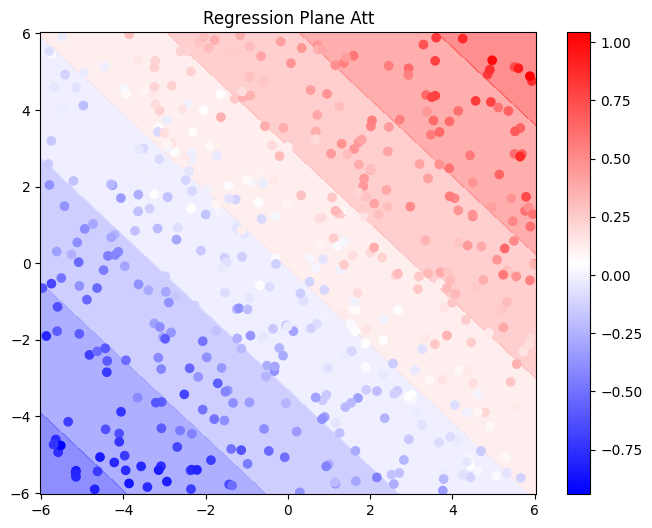

In [4]:
plane_att_n_heads.model.eval()
# to run this my memory is not enough
# Z = plane_att_n_heads.model(X)
batch_size = 64
Z = torch.zeros(X.shape[0], 1)
for i in range(0, X.shape[0], batch_size):
    end = min(i + batch_size, X.shape[0])
    batch_x = X[i:end]
    Z[i:end] = plane_att_n_heads.model(batch_x)

Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z.detach().numpy(), cmap=plt.cm.bwr, alpha=0.5)
plt.scatter(plane_att_n_heads.valset.x, plane_att_n_heads.valset.y, c=plane_att_n_heads.valset.label, cmap=plt.cm.bwr)
plt.title('Regression Plane Att')
plt.colorbar()
plt.show()


torch.Size([64, 8]) torch.Size([64, 8])


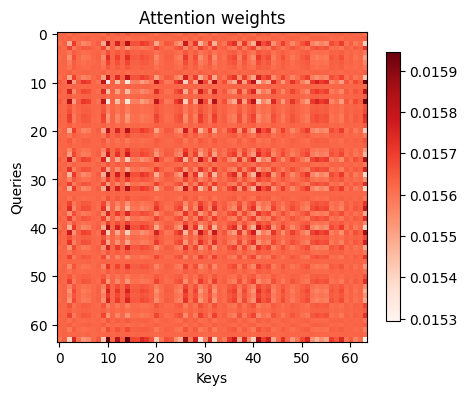

In [5]:
from torch.nn import functional as F
import math
from draw import show_attention
for x, y in plane_att_n_heads.valloader:
    x = plane_att_n_heads.model.embed(x)
    q, k, v = plane_att_n_heads.model.c_attn(x).split(plane_att_n_heads.n_embd, dim=-1)
    print(q.shape, k.shape)
    wei = q @ k.transpose(-2, -1) / math.sqrt(plane_att_n_heads.n_embd)
    wei = F.softmax(wei, dim=-1)
    # print(wei.shape)
    show_attention(wei.detach().numpy())
    break

torch.Size([64, 4, 2]) torch.Size([64, 4, 2])
torch.Size([64, 4, 4])


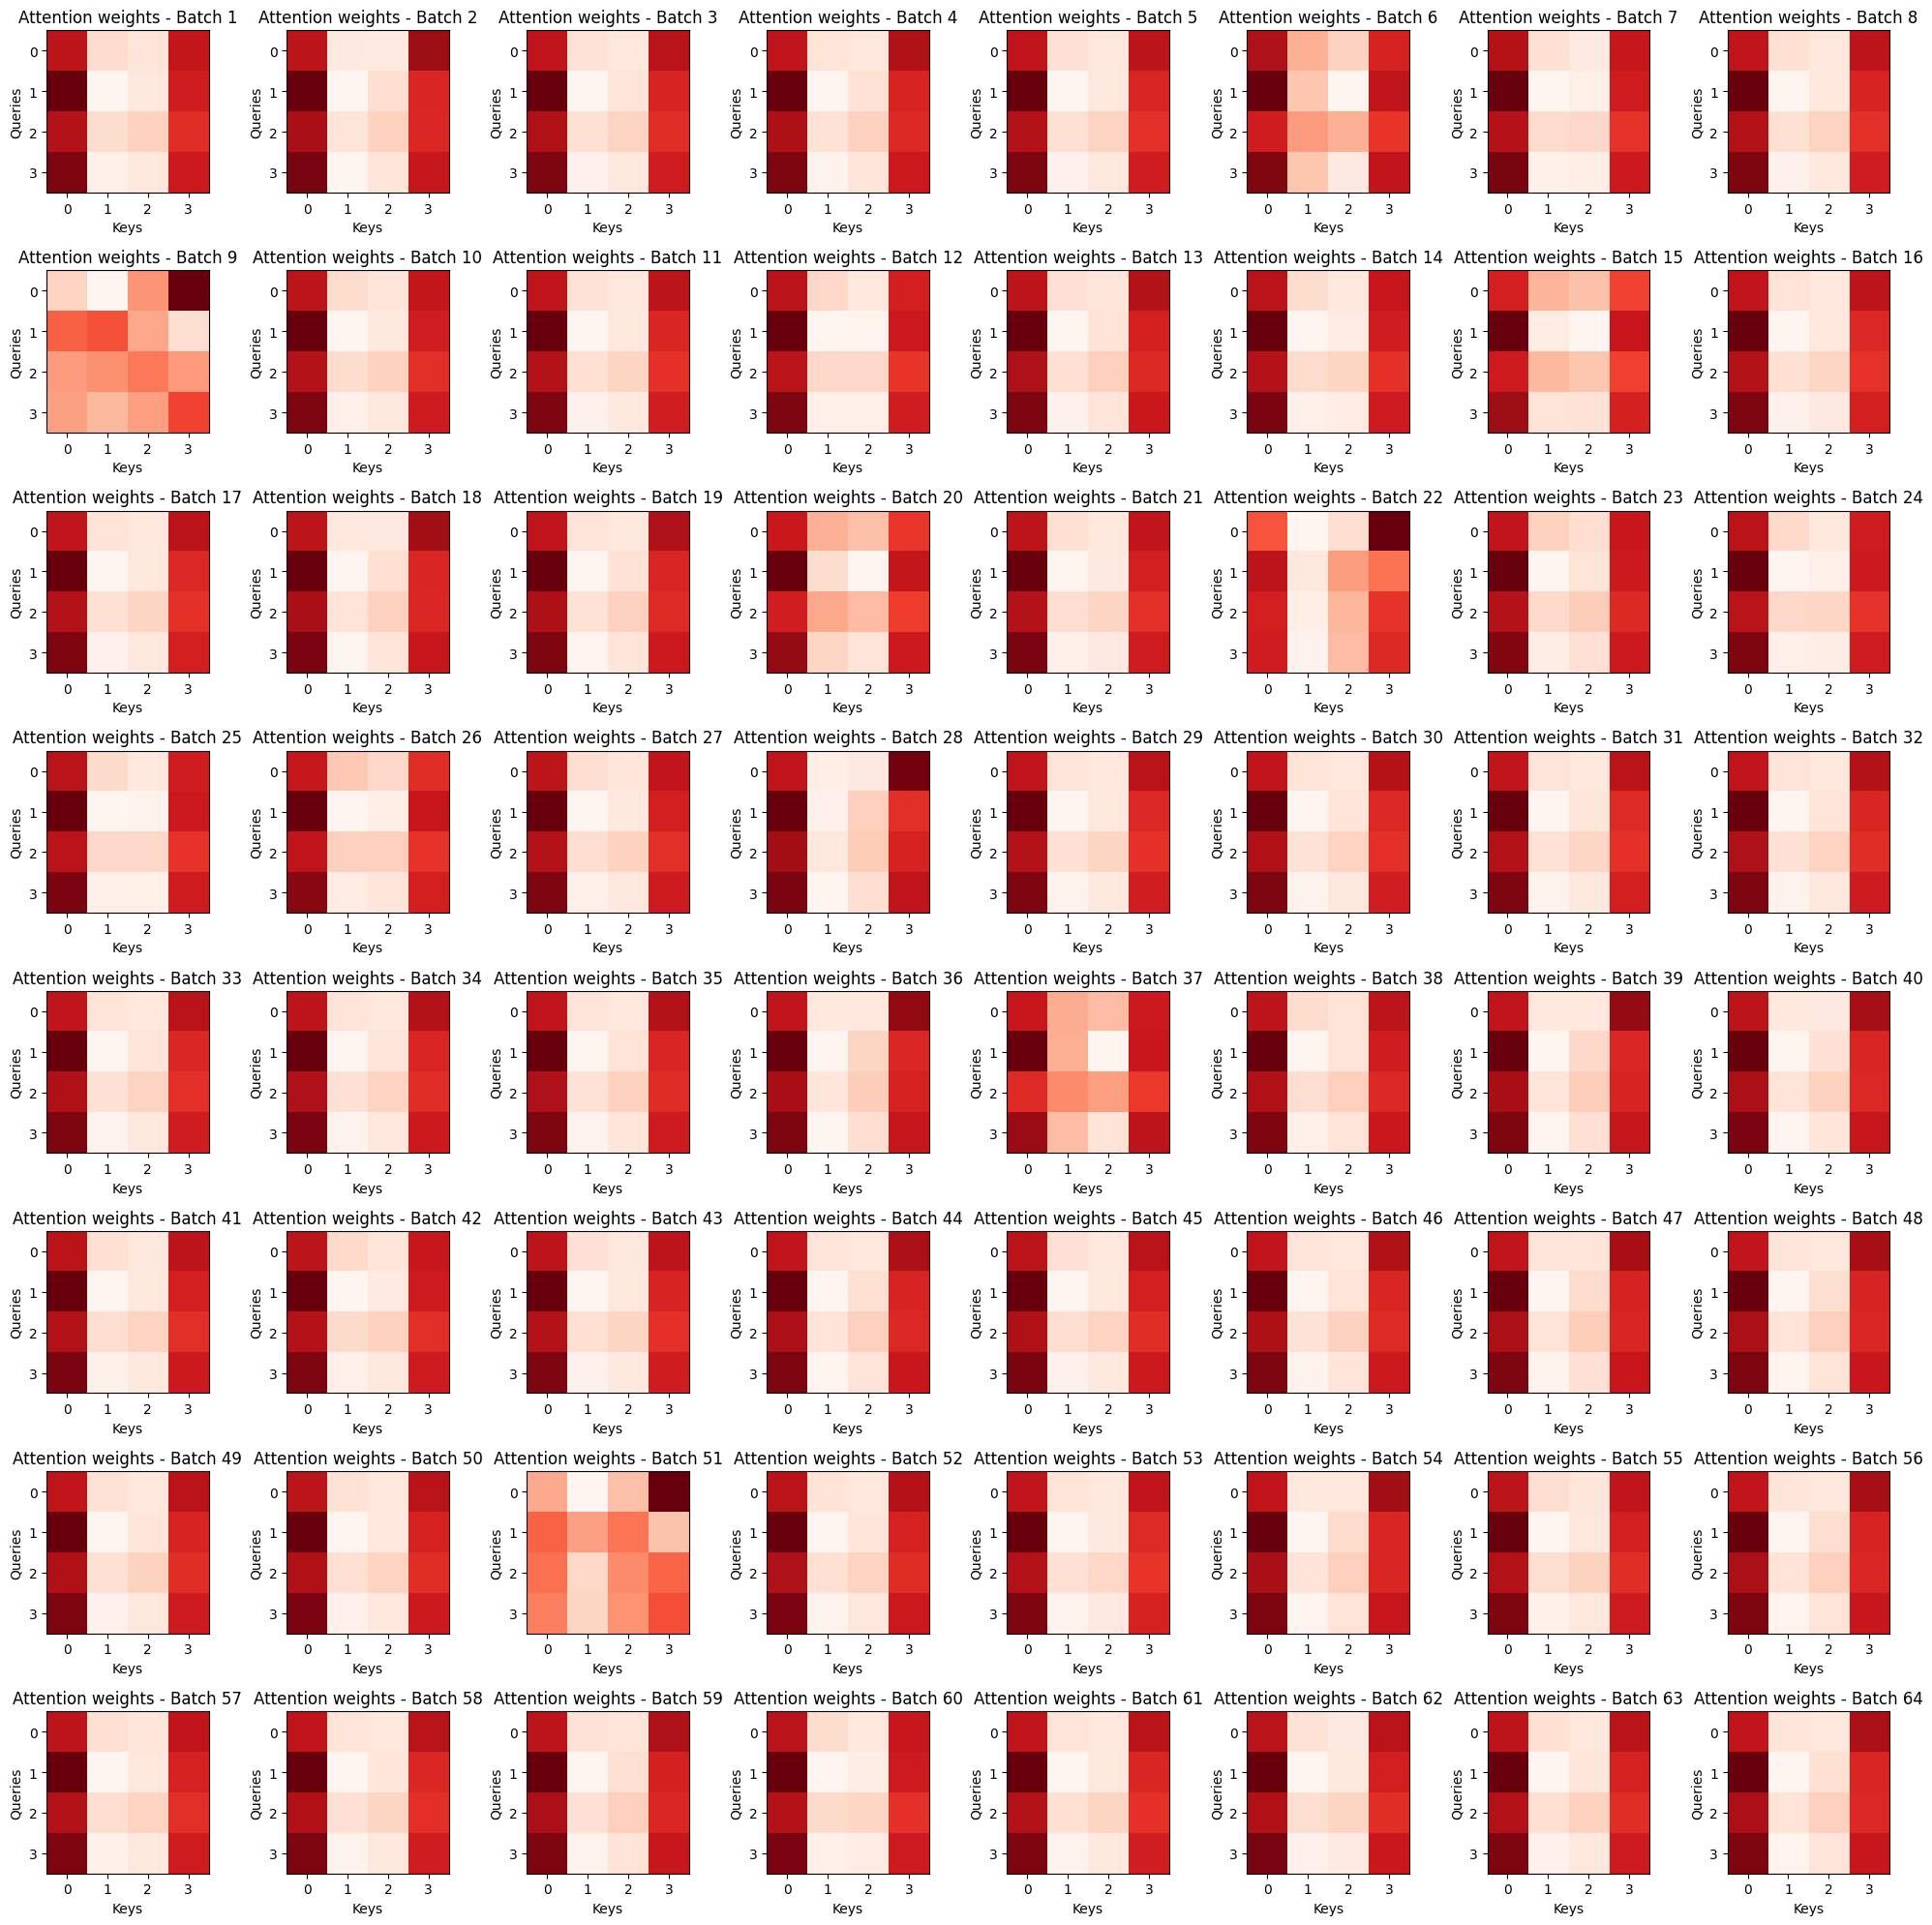

In [6]:
from draw import show_attention_batch
from einops import rearrange
for x, y in plane_att_n_heads.valloader:
    x = plane_att_n_heads.model.embed(x)
    q, k, v = plane_att_n_heads.model.c_attn(x).split(plane_att_n_heads.model.n_embd, dim=-1)
    q = rearrange(q, 'B (nh hs) -> B nh hs', nh=plane_att_n_heads.n_head)
    k = rearrange(k, 'B (nh hs) -> B nh hs', nh=plane_att_n_heads.n_head)
    v = rearrange(v, 'B (nh hs) -> B nh hs', nh=plane_att_n_heads.n_head)
    print(q.shape, k.shape)
    wei = q @ k.transpose(-2, -1) / math.sqrt(plane_att_n_heads.n_embd)
    wei = F.softmax(wei, dim=-1)
    print(wei.shape)
    show_attention_batch(wei.detach().numpy(),figsize=(20,20))
    break